## Project Title : Sales Prediction : Predicting sales of a major store chain Apollo Pharmacy

## Problem Description 

 Apollo Pharmacy operates over 4,000 drug stores. Currently, Apollo Pharmacy store managers are tasked with predicting their daily sales for up to 4 weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

We are provided with historical sales data for around 1000 Apollo Pharmacy stores. The task is to forecast the "Sales" column for the test set. 

##  Data Description 

### Apollo Pharmacy Stores Data.csv - historical data including Sales
### store.csv  - supplemental information about the stores


### Data fields
### Most of the features are self-explanatory.                                                                         
- The following are descriptions for those that aren't.

- Id - an Id that represents a (Store, Date) duple within the test set
- Store - a unique Id for each store
- Sales - the turnover for any given day (this is what you are predicting)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Diwali holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#### **Following are the 7 major steps of building Machine Learning Model** :
1. Collecting Data.
2. Preparing the Data
     - Exploratory Data Analysis.
     - feature engineering.


3. Choosing a Model
4. Training the Model.
5. Evaluating the Model.
6. Parameter Tuning.
7. Making Predictions.

In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

#**1.Collecting Data.**

In [2]:
#loading our Two Datasets
apollo_df = pd.read_csv('Apollo Pharmacy Stores Data.csv')
store_df = pd.read_csv('store.csv')


#**2.Preparing the Data**

##Now checking the shape of our DataFrames which helps to get an idea to know the number of rows and columns present in our both DataFrames.

In [3]:
#Checking the Number of rows and columns using Shape methods
apollo_df.shape, store_df.shape

((1017209, 9), (1115, 10))

##The apollo_df has 1017209 number of rows and 9 columns.
##The Store_df has 1115 number of rows and 10 column. 

#Using info() method we can easily get the idea of what kind of data type and null values inside our both dataframes we have.

In [4]:
#checking the info 
apollo_df.info(), store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assort

(None, None)

##### as we can see that in our apollo_df we have zero null values and in our Store_df we have too many null values.

##### geting the total sum of null values present in each columns in our Store_df using isnull() function present in pandas library. 

In [5]:
#calculating totall null values in our store dataframe
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

##### we can see that we have 6 columns in which we have null values. so we have to find correct way to fll these null values.

##### Remove features with high percentages of missing values

In [6]:
# remove features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

##### Firstly we looking to treat null values in cometiondistance column by checking its distribution.

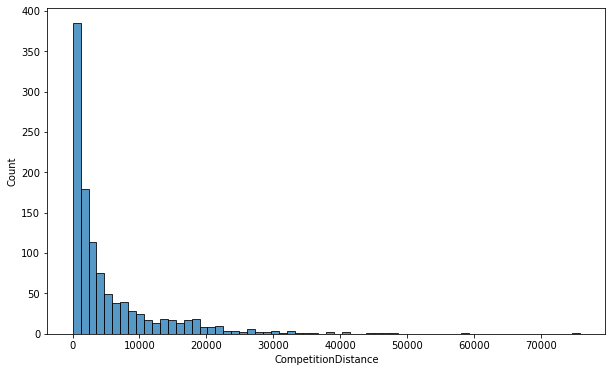

In [7]:
#checking the disribution of CompetitionDistance column
plt.figure(figsize=(10,6))
sns.histplot(store_df['CompetitionDistance'])
plt.show()

##### as we can see that the distribution look like right skewed distribution. so we dicided to fill null values with median 

In [8]:
#replacing Nan values in CompetitionDistance with median.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

##### Now checking the Null values

In [9]:
## Now checking Nan values
store_df.isna().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

##### Now we can see the numeric value and its aggregations like mean,mode,max and median using Describe method

In [10]:
#checking the mean mode and median in rossman_df dataset using describe function
apollo_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
#checking the mean mode and median in store_df dataset using describe function
store_df.describe()

,Store,CompetitionDistance,Promo2
count,1115.00000,1115.000000,1115.000000
mean,558.00000,5396.614350,0.512108
std,322.01708,7654.513635,0.500078
min,1.00000,20.000000,0.000000
25%,279.50000,720.000000,0.000000
50%,558.00000,2325.000000,1.000000
75%,836.50000,6875.000000,1.000000
max,1115.00000,75860.000000,1.000000


##### Using head function we can get an glimps of our both dataset. 

In [13]:
#using head() function we able to view top 5 rows 
apollo_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [14]:
#using head() function we able to view top 5 rows 
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,c,a,1270.0,0
1,2,a,a,570.0,1
2,3,a,a,14130.0,1
3,4,c,c,620.0,0
4,5,a,a,29910.0,0


##### Merge the apollo_df and Store_df by column 'Store' as in both csv Store column is common.

In [15]:
#mearging the two dataset using pd.merge funtion.
merge_apollo_df = pd.merge(apollo_df, store_df, on='Store', how='left')
merge_apollo_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0


In [16]:
#checking the shape
merge_apollo_df.shape

(1017209, 13)

##### Now we have 1017209 number of rows and 13 columns.

In [17]:
#checking the info/ datatype in our merged dataframe
merge_apollo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Date                 1017209 non-null  object 
 3   Sales                1017209 non-null  int64  
 4   Customers            1017209 non-null  int64  
 5   Open                 1017209 non-null  int64  
 6   Promo                1017209 non-null  int64  
 7   StateHoliday         1017209 non-null  object 
 8   SchoolHoliday        1017209 non-null  int64  
 9   StoreType            1017209 non-null  object 
 10  Assortment           1017209 non-null  object 
 11  CompetitionDistance  1017209 non-null  float64
 12  Promo2               1017209 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 108.6+ MB


##### As we can see that many columns our in object datatype so we have to check the datatype of thses column because our machine learning algorithms only takes numberical values.

### first we have date column we have to separate the date, month and year from that.

In [18]:
#creating new variable date month and year from Date column 
merge_apollo_df['year'] = merge_apollo_df['Date'].apply(lambda x: x.split('-')[0])
merge_apollo_df['month'] = merge_apollo_df['Date'].apply(lambda x: x.split('-')[1])
merge_apollo_df['date'] = merge_apollo_df['Date'].apply(lambda x: x.split('-')[2])

In [19]:
merge_apollo_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,date
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,2015,07,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,2015,07,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,2015,07,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0,2015,07,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0,2015,07,31


##### So as we have catagorical values in StateHoliday so we can use pd.getdummies to create dummies variable. 

In [20]:
#calculation value counts using value_counts() funtion
merge_apollo_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [21]:
merge_apollo_df.loc[merge_apollo_df['StateHoliday'] == '0', 'StateHoliday'] = 0

In [22]:
merge_apollo_df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [23]:
# One hot encoding
merge_apollo_df = pd.get_dummies(merge_apollo_df, columns=["StateHoliday"],drop_first=True)

In [24]:
merge_apollo_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,c,a,1270.0,0,2015,07,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,a,a,570.0,1,2015,07,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,a,a,14130.0,1,2015,07,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,c,c,620.0,0,2015,07,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,a,a,29910.0,0,2015,07,31,0,0,0


In [25]:
merge_apollo_df['StateHoliday_a'].value_counts()

0    996949
1     20260
Name: StateHoliday_a, dtype: int64

##### Now in Assortment column we have to levelized the catagorical value in a form of 0,1,2 which we give some weightage to model predictions.

In [26]:
merge_apollo_df['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [27]:
# code for changing Assortment dtype from object to int.
merge_apollo_df['Assortment'] = np.where((merge_apollo_df['Assortment'] == 'a'),0,merge_apollo_df['Assortment'])
merge_apollo_df['Assortment'] = np.where((merge_apollo_df['Assortment'] == 'b'),1,merge_apollo_df['Assortment'])
merge_apollo_df['Assortment'] = np.where((merge_apollo_df['Assortment'] == 'c'),2,merge_apollo_df['Assortment'])

##### Now in StoreType we did not use One hot encoding because if we done hone encoding which give equal weightage to our model. so as per domain knowledge we can labeled as 0,1,2,3 as store type.


*   store_type 0 means small store_type.
*   store_type 1 means medium store_type.

*   store_type 2 means large store_type.
*   store_type 3 means huge store_type.





In [28]:
merge_apollo_df['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [29]:
#converting catagorical value into interger values based on store type class.
merge_apollo_df['StoreType'] = np.where((merge_apollo_df['StoreType'] == 'a'),0,merge_apollo_df['StoreType'])
merge_apollo_df['StoreType'] = np.where((merge_apollo_df['StoreType'] == 'b'),1,merge_apollo_df['StoreType'])
merge_apollo_df['StoreType'] = np.where((merge_apollo_df['StoreType'] == 'c'),2,merge_apollo_df['StoreType'])
merge_apollo_df['StoreType'] = np.where((merge_apollo_df['StoreType'] == 'd'),3,merge_apollo_df['StoreType'])

In [30]:
merge_apollo_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,2,0,1270.0,0,2015,07,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,570.0,1,2015,07,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,14130.0,1,2015,07,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2,2,620.0,0,2015,07,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,29910.0,0,2015,07,31,0,0,0


##### Some of the columns now showing when we use head().

In [31]:
#pd.set_option('display.max_columns', None)

In [32]:
#merge_apollo_df.head()

##### lets check the info of our dataframe.

In [33]:
merge_apollo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Date                 1017209 non-null  object 
 3   Sales                1017209 non-null  int64  
 4   Customers            1017209 non-null  int64  
 5   Open                 1017209 non-null  int64  
 6   Promo                1017209 non-null  int64  
 7   SchoolHoliday        1017209 non-null  int64  
 8   StoreType            1017209 non-null  object 
 9   Assortment           1017209 non-null  object 
 10  CompetitionDistance  1017209 non-null  float64
 11  Promo2               1017209 non-null  int64  
 12  year                 1017209 non-null  object 
 13  month                1017209 non-null  object 
 14  date                 1017209 non-null  object 
 15

##### As we can see that some of our features are in object datatype so we have to first convert into interger or float. so that our machine learning algorithm will understand these feature.

In [34]:
#converting object dtype to integer.
merge_apollo_df['year']= merge_apollo_df['year'].astype(int)
merge_apollo_df['month']= merge_apollo_df['month'].astype(int)
merge_apollo_df['date']= merge_apollo_df['date'].astype(int)
merge_apollo_df['StoreType']= merge_apollo_df['StoreType'].astype(int)
merge_apollo_df['Assortment']= merge_apollo_df['Assortment'].astype(int)

##### making a copy of our processed dataset to prevent that if we mistakenly do some change via code like inplace = true .

In [35]:
final_df = merge_apollo_df.copy()

##### Checking the Duplicate Values in our final dataset.

In [36]:
# Checking Duplicate Values
value=len(final_df[final_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


## **Exploratory Data Analysis**

In [37]:
#checking the first 5 rows of our dataframe
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,2,0,1270.0,0,2015,7,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,570.0,1,2015,7,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,14130.0,1,2015,7,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2,2,620.0,0,2015,7,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,29910.0,0,2015,7,31,0,0,0


##### Our Target variable is Sales so we have to check the distrubution.

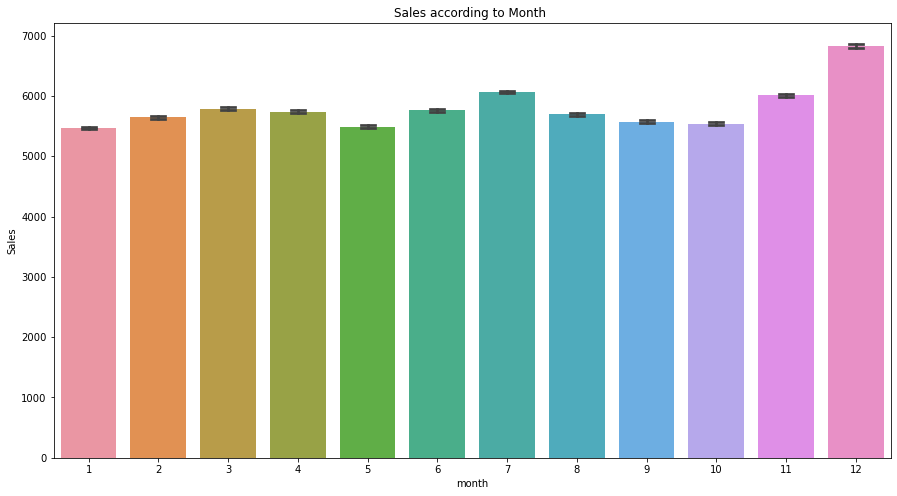

In [38]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='month',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Month ')
plt.show()

##### In the above chart The sales in the month of December is high beacuse of winter holidays and Christmas festival and also new year so. Lots of stores start many offers on some products so people will more buy discounted items.

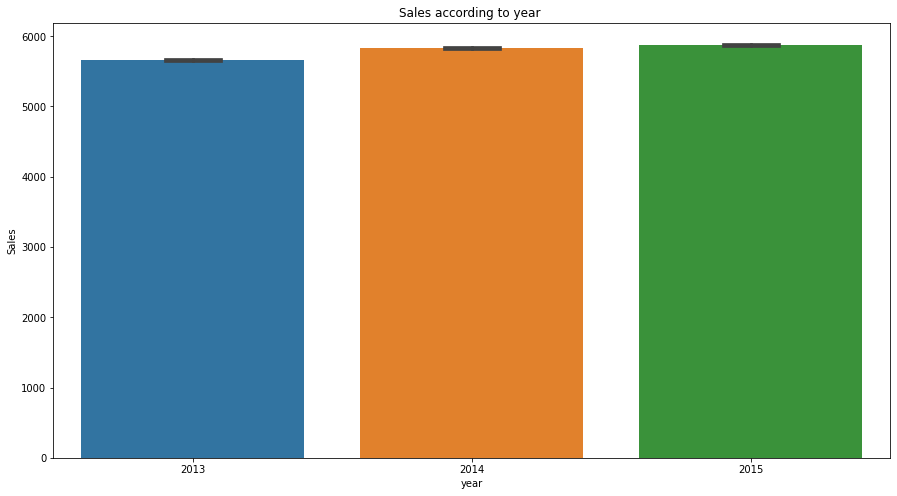

In [39]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='year',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to year ')
plt.show()

##### In this chart of sales according to years shows that in 2014 and 2015 have almost same sales through out the year but in 2013 there is slightly low sales. 

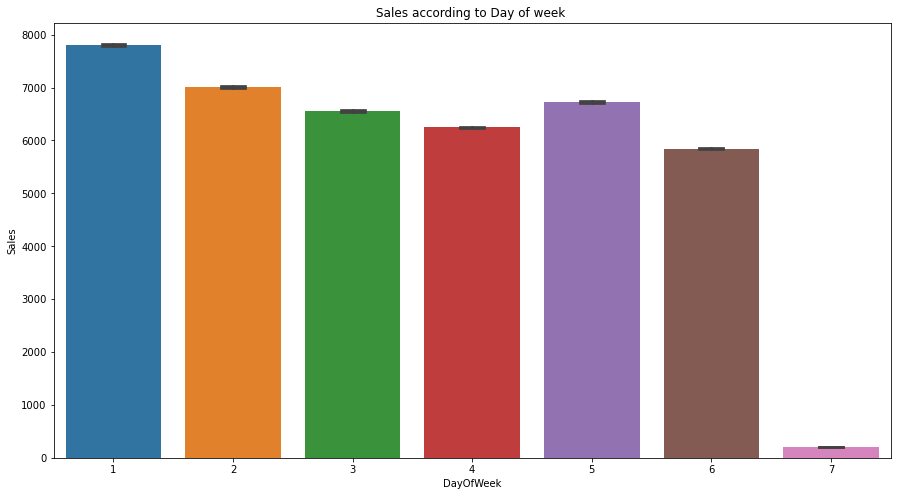

In [39]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='DayOfWeek',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Day of week ')
plt.show()

##### In the above chart The sales in the 7th day of the week having very low sales may be on sunday there were very less amount of stores open. 

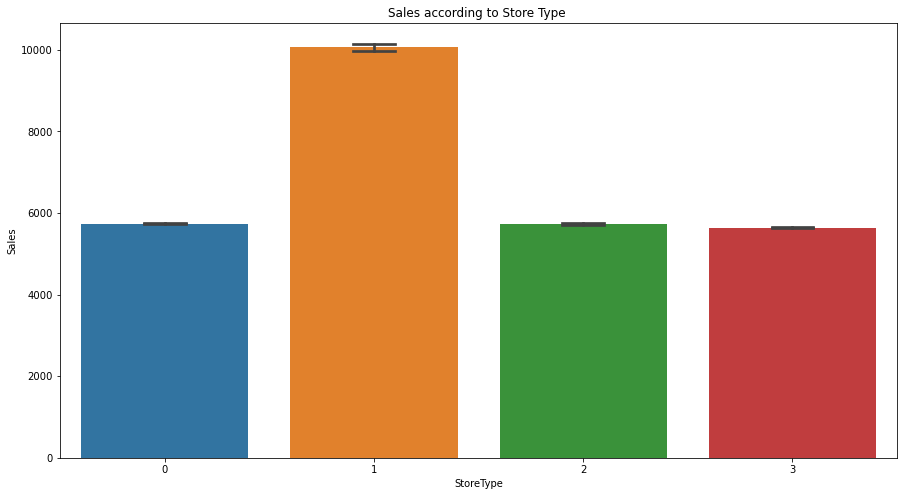

In [40]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='StoreType',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Store Type ')
plt.show()

##### In the above chart The sales in the store type 1 have higher sales as compare to other store catagory. the rest of store having almost same sales.

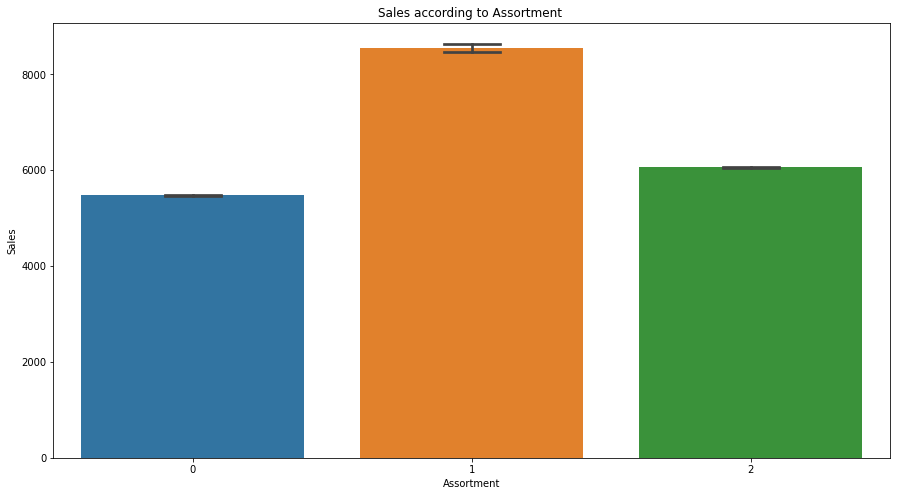

In [42]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='Assortment',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Assortment ')
plt.show()

##### In the above chart The sales in which product assortment type 1 have higher sales as compare to other assortment catagory. the rest of assortment having almost same sales.

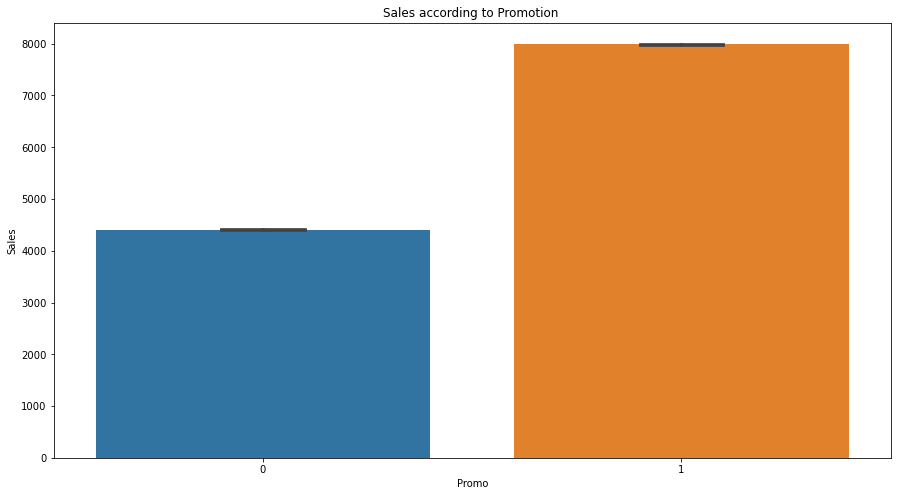

In [41]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='Promo',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Promotion ')
plt.show()

##### As we can see that the store who participating in promotion having more sales as compare to other. which means promotion is the key to attract the customer towards the store.

##### As we can see that our target variable 'Sales' look like normal distribution. 

##### Now check the distribution of our each features

In [43]:
numeric_features = list(final_df.describe().columns)
numeric_features

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'Promo2',
 'year',
 'month',
 'date',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c']

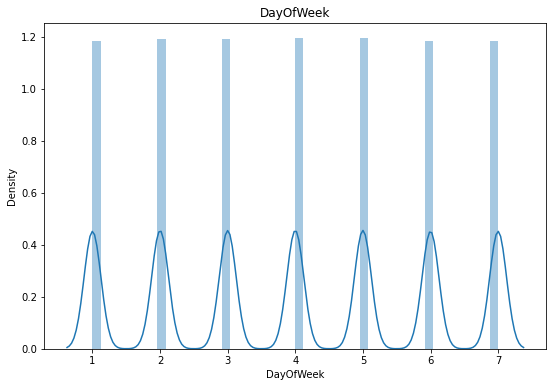

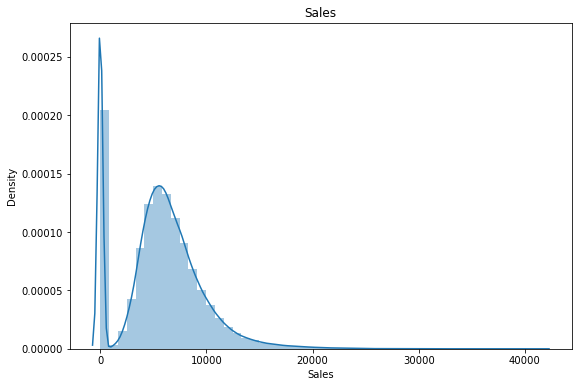

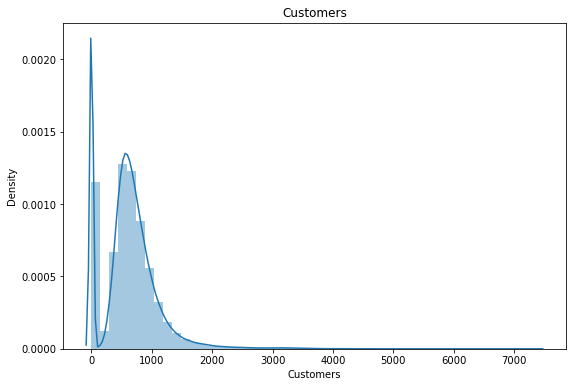

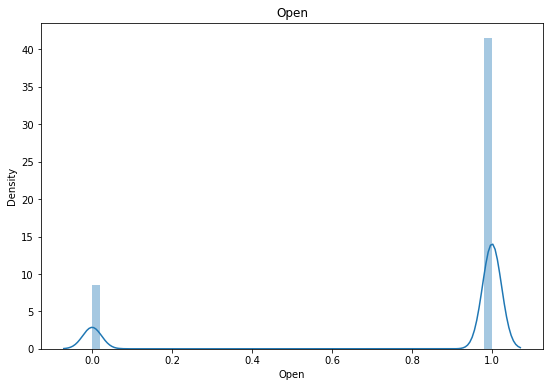

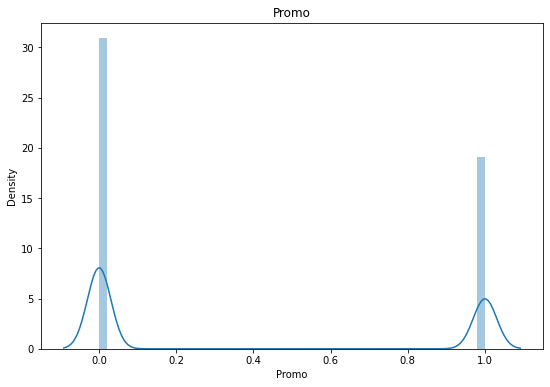

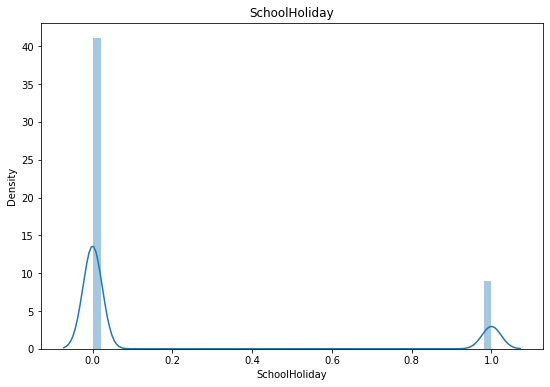

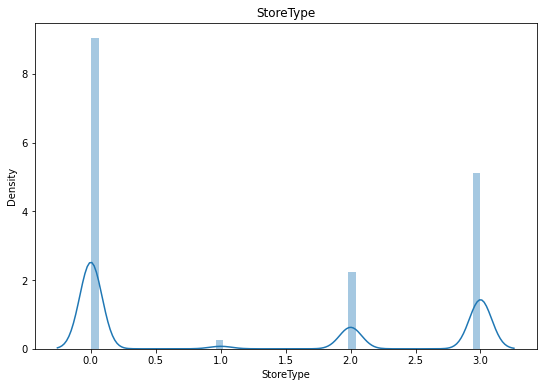

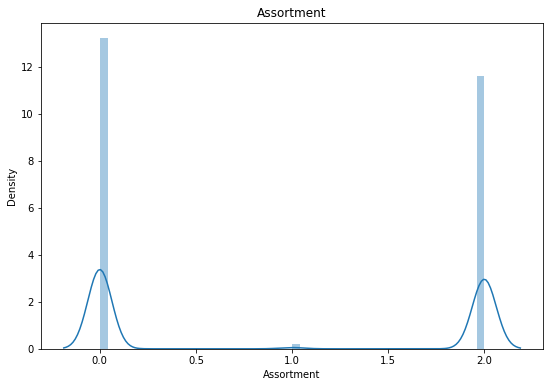

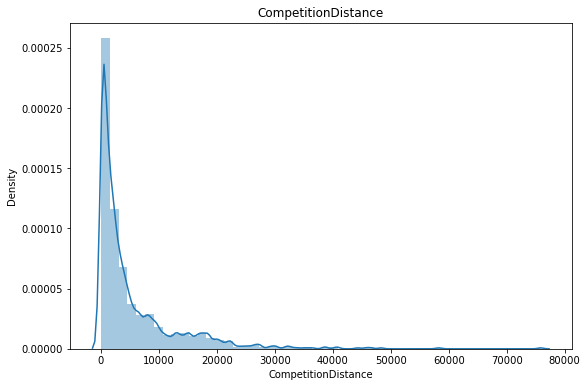

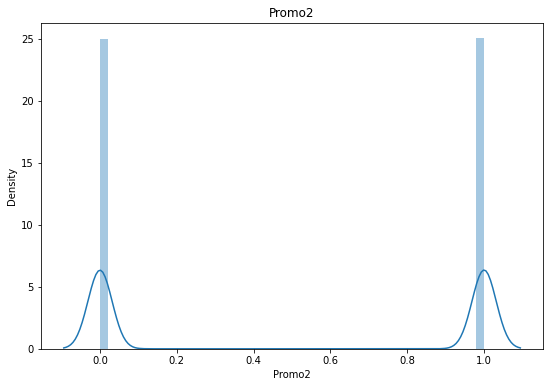

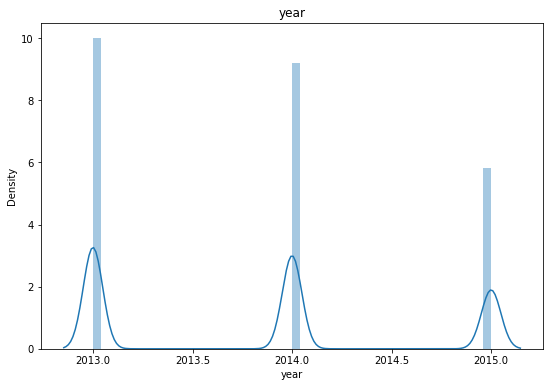

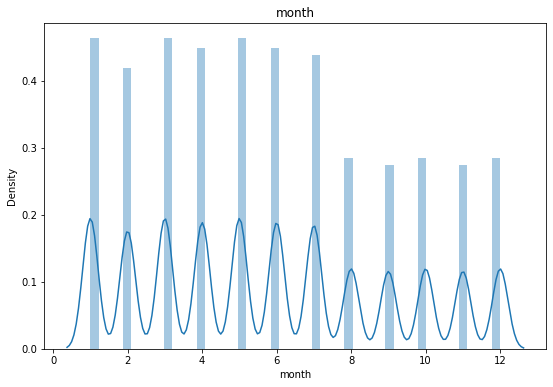

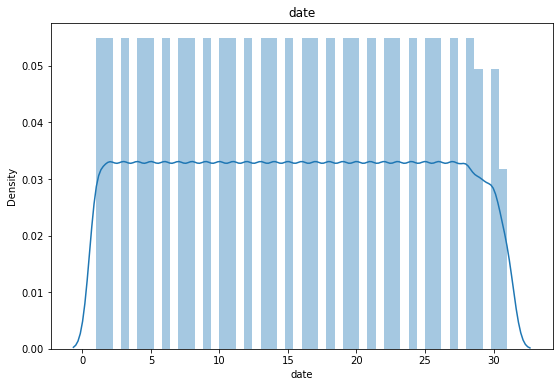

In [44]:
#printing displots to analyze the distribution of all numerical features
# plot a bar plot for each numerical feature count (except store)

for col in numeric_features[1:-3]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final_df[col]
    sns.distplot(feature,ax = ax)    
    ax.set_title(col)
plt.show()

##### In the above charts we see that many features has catogorical value so its more look like skewed chart and rest of the feature also not normaly distributed. So by using log1p transformation we are able to make our distribution more closer to look like normal distribution.


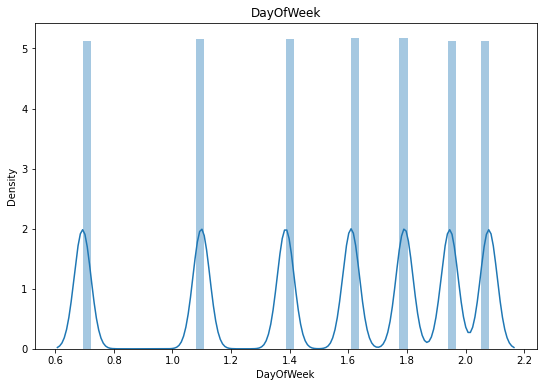

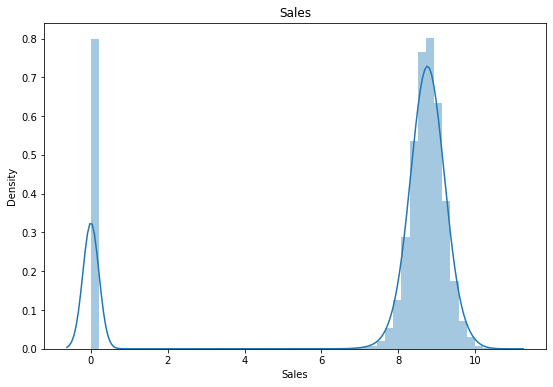

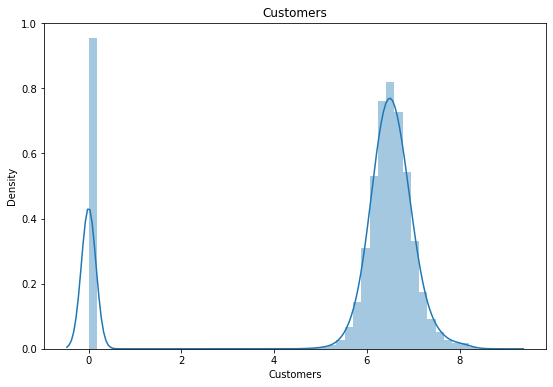

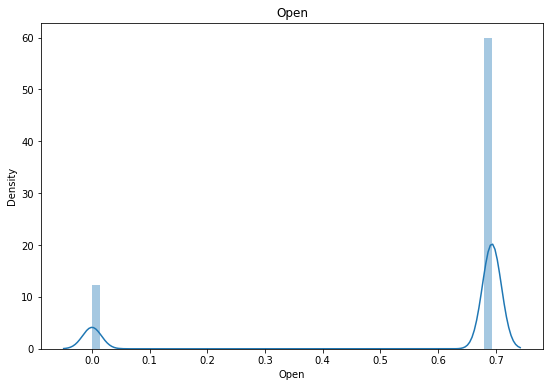

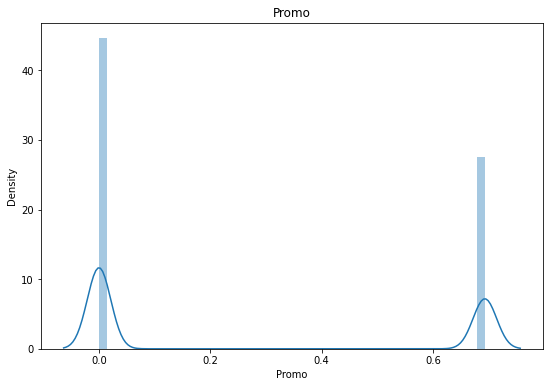

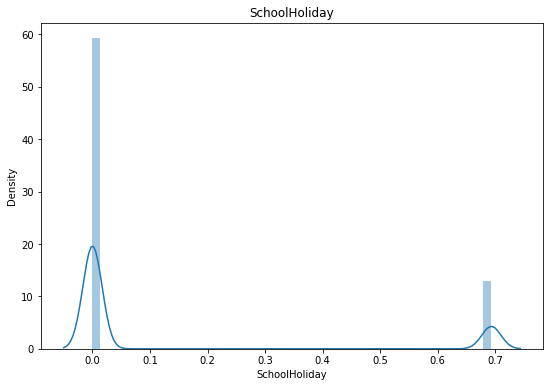

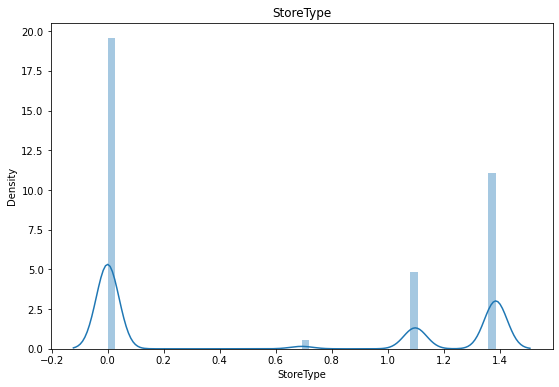

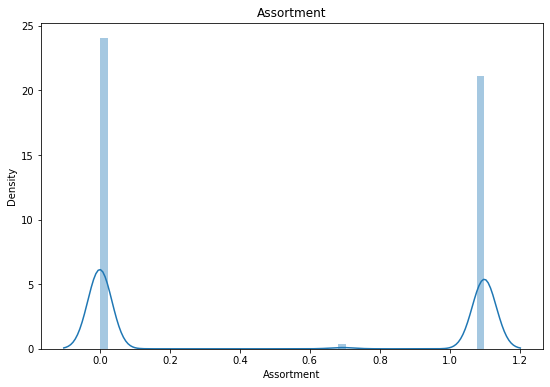

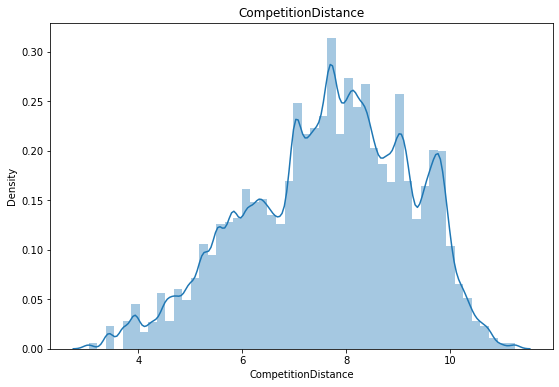

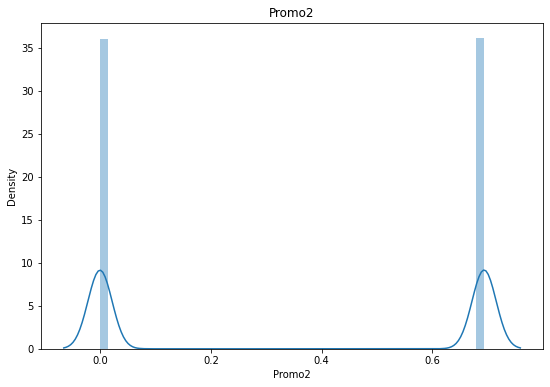

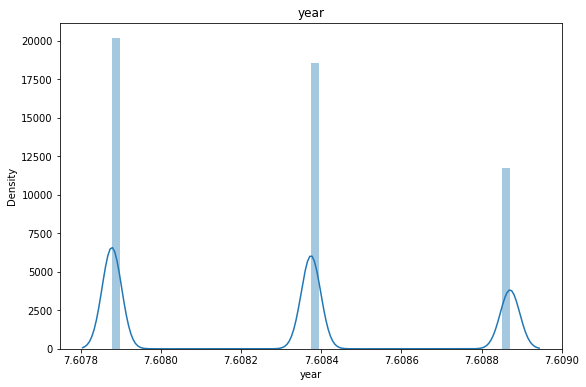

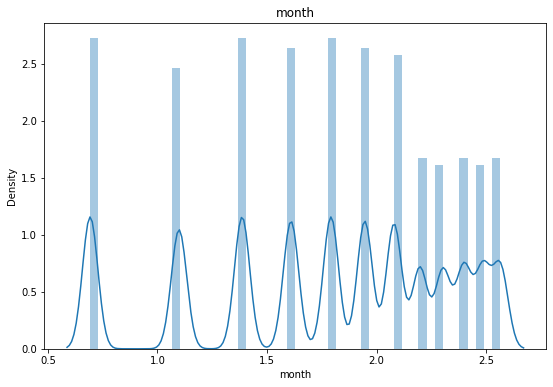

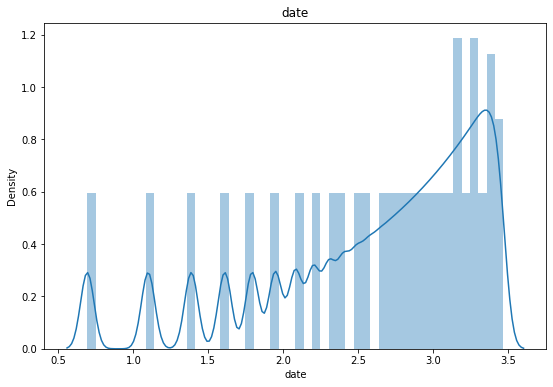

In [46]:
#printing displots to analyze the distribution of all numerical features
# plot a bar plot for each numerical feature count (except store) with  log1p tranformation.

for col in numeric_features[1:-3]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log1p(final_df[col])
    sns.distplot(feature)    
    ax.set_title(col)    
    
plt.show()

##### now we can see that some of our features like CompititionDistance now more look like normal distribution. rest of our feature still not normaly distributed some of feature has multi mode. beacuse of some features have catagorical values like 1,0.

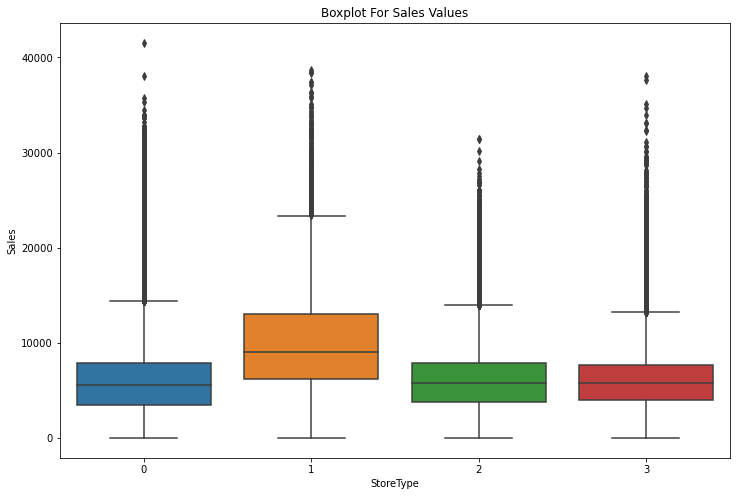

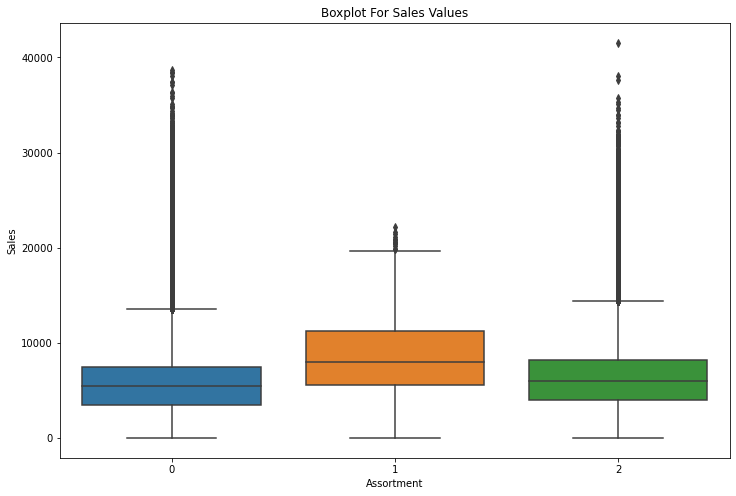

In [46]:
for col in ['StoreType','Assortment']:
    plt.figure(figsize=(12, 8))
    plot_storetype_sales = sns.boxplot(x=col, y="Sales", data=final_df)
    plt.title('Boxplot For Sales Values')
plt.show()

##### In this above boxplot we see too many outliers. if we look at the data and apply some domain knowledge . we easily understand that these values are not outliers.
For Example :-
if a store start giving discount on some products which means number of sales increase due to some discount. so when we compline our data and plot and box plot on a yearly based data so some of our value shown as outliers.beacuse in some month or an specific occasions store giving some discount.  

## Feature Engineering

#### Checking the correlation of each feature with our dependend feature 'Sales'

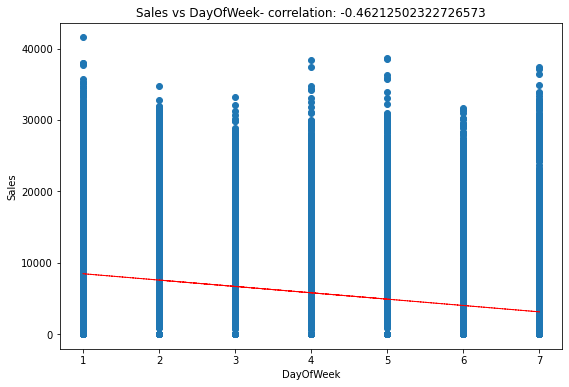

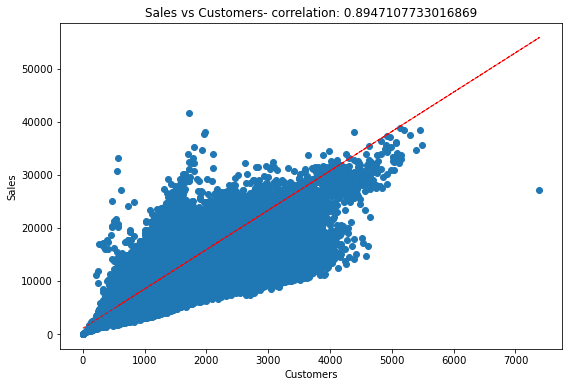

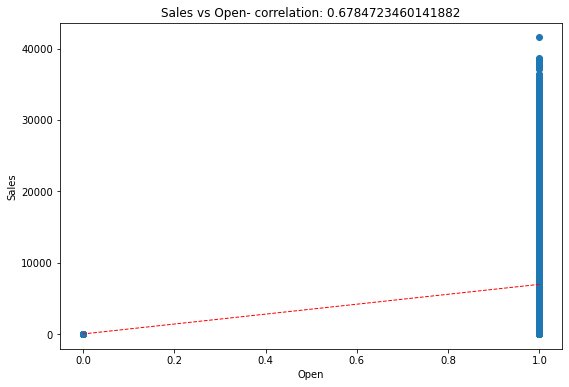

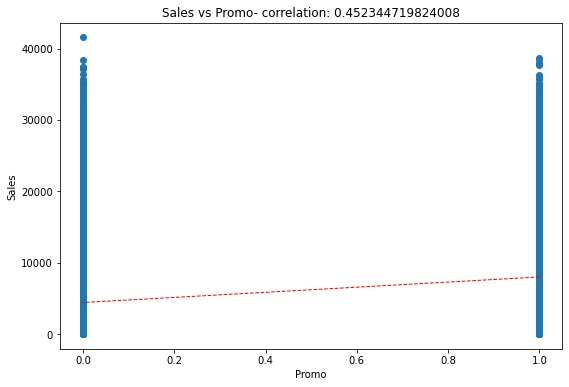

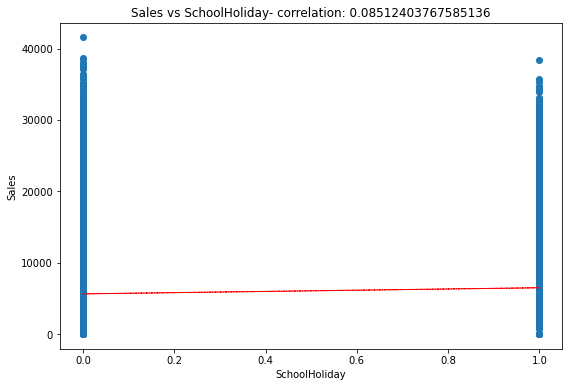

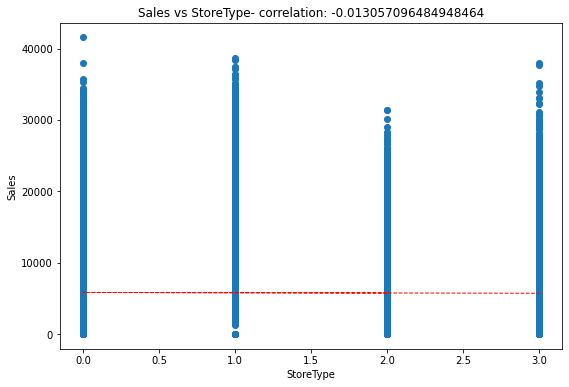

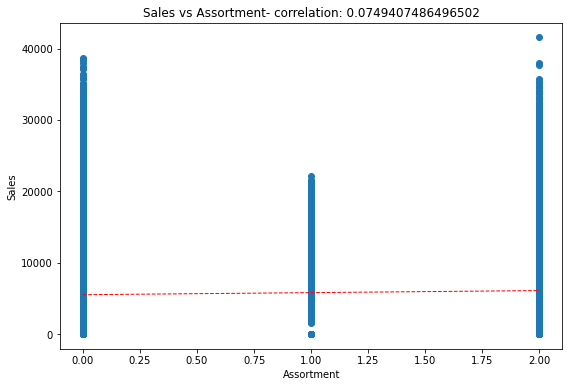

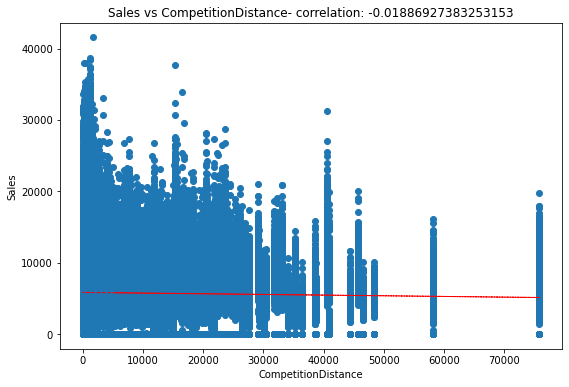

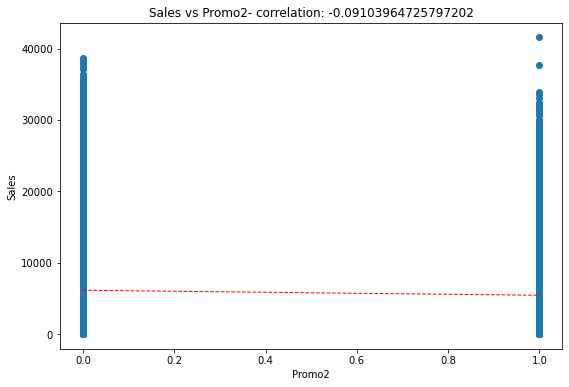

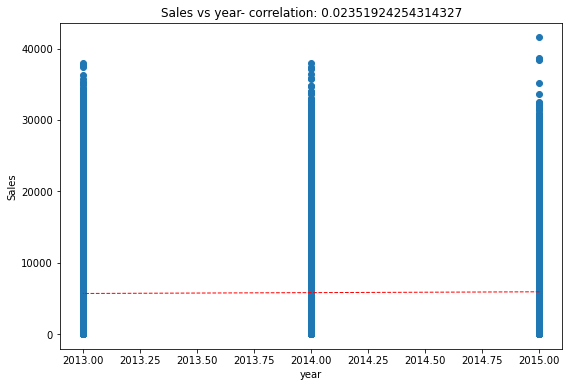

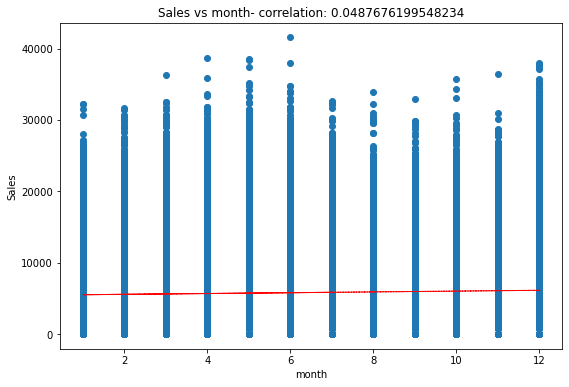

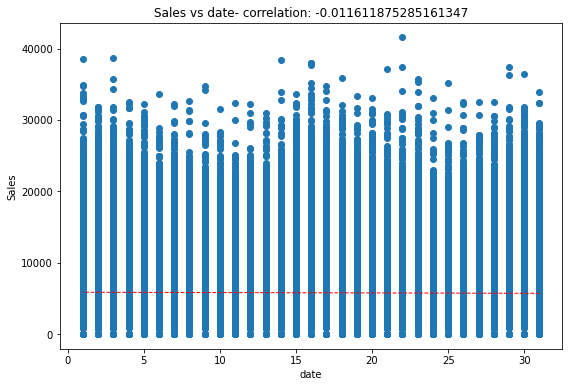

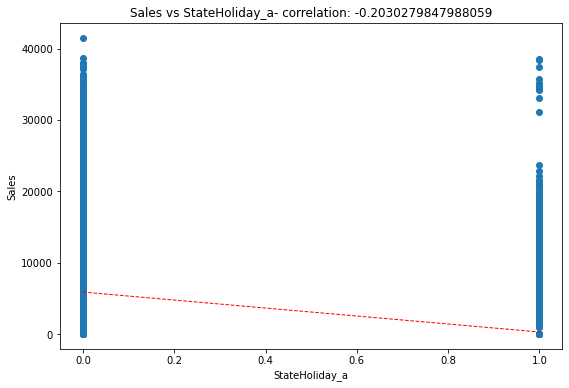

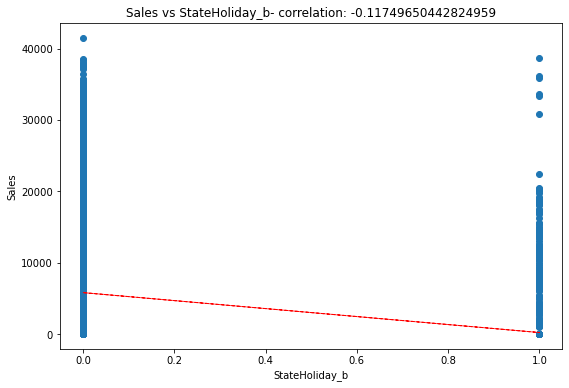

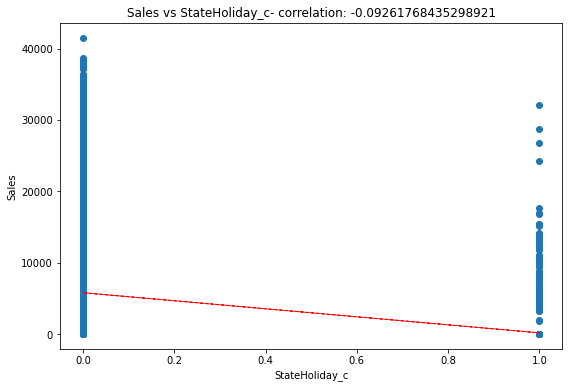

In [47]:
for col in numeric_features:
  if col not in ['Store','Date','Sales']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final_df[col]
    label = final_df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(final_df[col], final_df['Sales'], 1)
    y_hat = np.poly1d(z)(final_df[col])

    plt.plot(final_df[col], y_hat, "r--", lw=1)

plt.show()

##### In the above charts the Customer Feture has highly corelated to our target variable Sales.

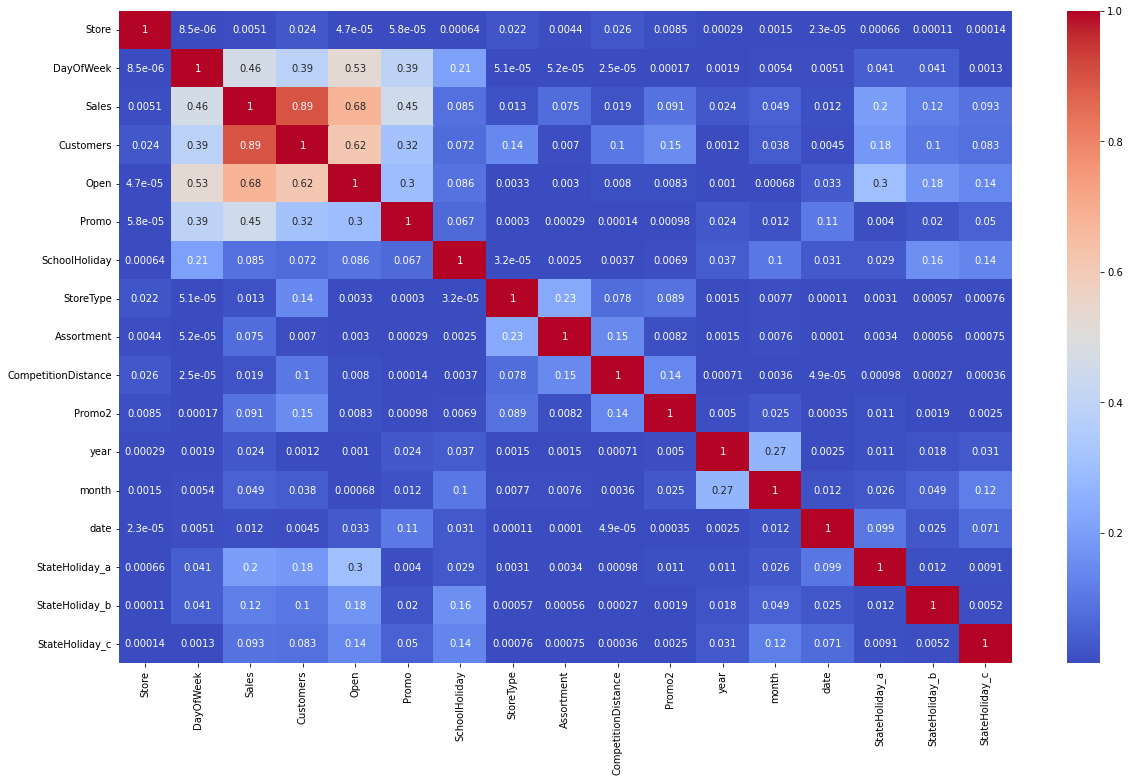

In [49]:
## Correlation heatmap
plt.figure(figsize=(20,12))
correlation = final_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

## Feature Selection.

##### as we observ our dataset in which we have feature name called 'Open' which simply tells us weather a store open or closs. so sales only generated when store is open. So we have to eleminate those rows/ observation in which store is closs or its value = 0. then we have only data of store which is open. so we also drop that columns because all the observation values are same as '1'.

In [48]:
final_df[(final_df['Open'] == 0) & (final_df['Sales'] == 0)].count()[0]

172817

In [49]:
final_df = final_df.drop(final_df[(final_df['Open'] == 0) & (final_df['Sales'] == 0)].index)

In [50]:
final_df = final_df.copy()

In [51]:
#Multicollinearity

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [52]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
0,DayOfWeek,5.768711
1,Customers,5.395052
2,Promo,2.064591
3,SchoolHoliday,1.285619
4,StoreType,1.970762
5,Assortment,2.047143
6,CompetitionDistance,1.613343
7,Promo2,2.160861
8,year,23.792592
9,month,4.166033


##### The Multicollinearity of 'year' is very high so we decided to drop these column for our linear Regression model.
#Because the the multicollinearity of each independeble feature should be under 10.

In [53]:
#Checking multicollinearity 
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Store','Sales','Open','year']]])

,variables,VIF
0,DayOfWeek,4.045907
1,Customers,4.107350
2,Promo,1.893498
3,SchoolHoliday,1.271504
4,StoreType,1.886218
5,Assortment,2.029049
6,CompetitionDistance,1.531443
7,Promo2,1.936858
8,month,3.682037
9,date,3.630245


In [54]:
final_df.shape

(844392, 18)

In [56]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final_df.columns.drop(['Store','Sales','Open','Date'])

##### Creating the X,y values for our algorithm.

In [57]:
# Create the data of independent variables
X = final_df[indep_var].values

# Create the dependent variable data
y = final_df[dep_var].values

##### Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [58]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)
print(X_train.shape)
print(X_test.shape)

(675513, 14)
(168879, 14)


In [59]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Now Lets implement 3 models on our dataset:

1.   Linear Regression.
   *   Lasso
   *   Ridge
  
2.  Decision Tree
3.  Random Forrest
   *   Random Forrest with Optimization


##### We will be using search algorithms/Optimization for each :

1.  GridSearchCV


##### We will be using following Matrics to check our model performance :
1.   Mean Absolute Error (MAE)
2.   Root Mean Square Error (MSE)
3.   Mean Square Error (MSE)
4.   R Squared (R2)
5.   Adjusted R Squared

## LINEAR REGRESSION

In [60]:
# Fitting Multiple Linear Regression to the Training set
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [61]:
# Predicting the Test set results
y_pred = reg.predict(X_test)
y_pred

array([ 6838.1372695 ,  5126.67405493, 19619.54486016, ...,
        4515.0086296 ,  6456.36823472,  8812.33867214])

##### Checking the score on train set.

In [62]:
#check the score
reg.score(X_train, y_train)

0.7620752504291628

In [63]:
#check the coefficeint
reg.coef_

array([-118.43951945, 2557.27423109,  640.74156404,   15.34062506,
        374.73182301,  197.5308371 ,  227.96269272,  120.72581132,
        137.29018372,  132.40417842,   10.39806154,  -55.35367976,
        -38.92406047,  -15.83125905])

In [64]:
#check the intercept
reg.intercept_

6960.651851259703

In [65]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

##### Checking the Performance on train set

In [67]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE

MSE_lr= mean_squared_error(y_train,y_pred_train)
print("MSE :",MSE_lr)

#calculate RMSE

RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE

MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

#import the packages

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2298777.758847187
RMSE : 1516.1720742868163
MAE : 1047.8075013344674
R2 : 0.7620752504291628
Adjusted R2 : 0.762055524812726


##### Looks like our r2 score value is 0.76 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [68]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

##### Checking the Performance on test set

In [69]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 2270029.7493628035
RMSE : 1506.6617899723892
MAE : 1044.5745723182704
R2 : 0.761877157862679
Adjusted R2 : 0.7618574158229907


##### The r2_score for the test set is 0.76. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [70]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

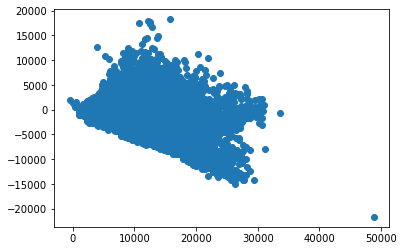

In [71]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.show()

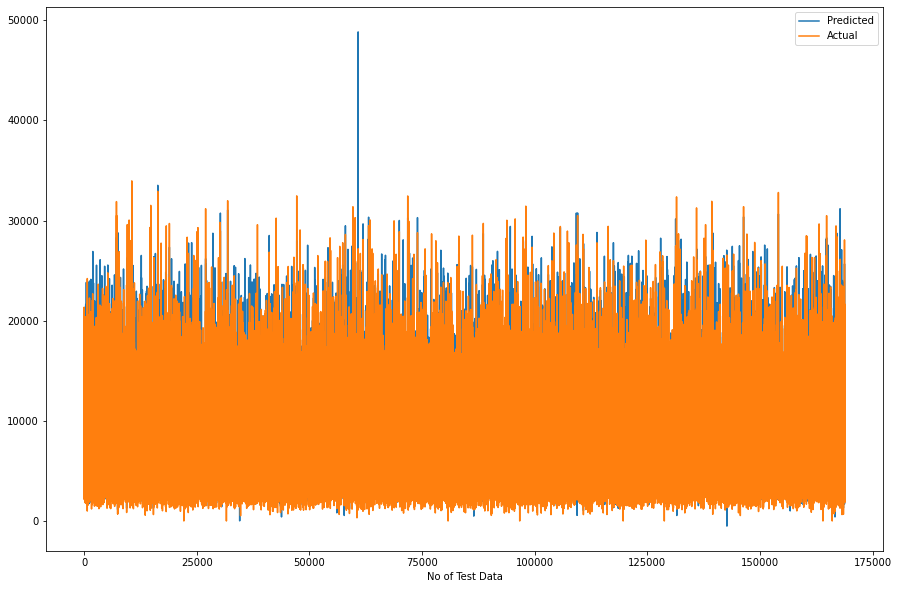

In [72]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### Now doing Regularization with the help of Lasso(L1), Ridge(L2)

### LASSO REGRESSION

In [76]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.7618771587392345 0.7620752504291478


In [77]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

##### Checking the Performance on train set

In [78]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2298777.7588473316
RMSE : 1516.172074286864
MAE : 1047.807503420458
R2 : 0.7620752504291478
Adjusted R2 : 0.762055524812711


##### Looks like our r2 score value is 0.76 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [79]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

##### Checking the Performance on test set

In [80]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2270029.7410065825
RMSE : 1506.661787199298
MAE : 1044.5745718709754
R2 : 0.7618771587392345
Adjusted R2 : 0.7618574166996188


##### The r2_score for the test set is 0.76. This means our linear model performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [81]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

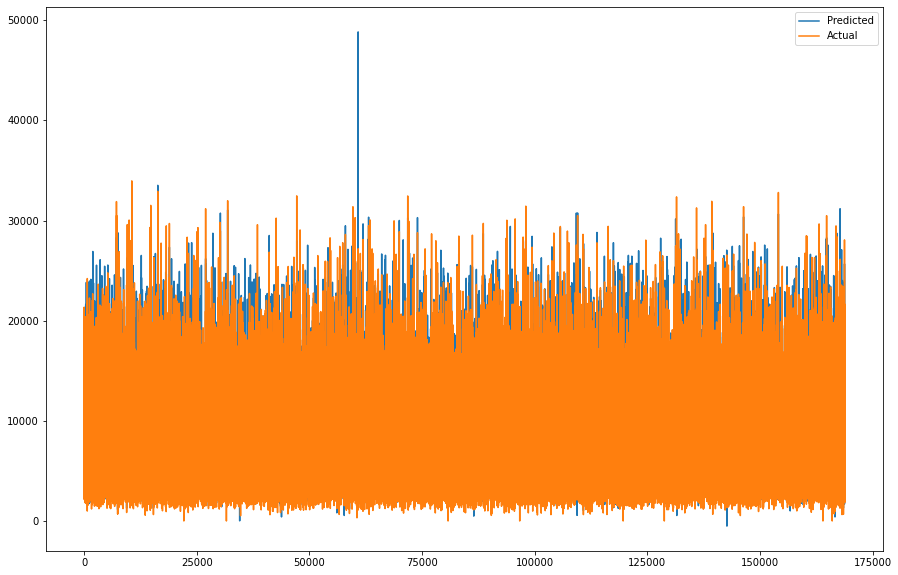

In [82]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

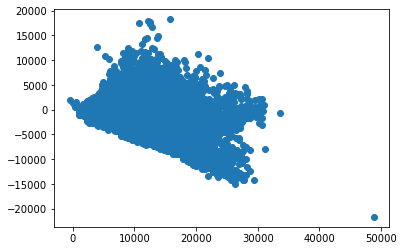

In [83]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))
plt.show()

### LASSO REGRESSION WITH CROSS VALIDATION.

In [84]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-10,1e-5,1e-3,1e-1,1,5,10,30,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.1, 1, 5, 10, 30, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [85]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -2298932.434352162


In [86]:
#get the X_train and X-test value
y_pred_train_lasso=lasso_regressor.predict(X_train)
y_pred_test_lasso=lasso_regressor.predict(X_test)

##### Checking the Performance on train set

In [87]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2298777.7588617476
RMSE : 1516.172074291618
MAE : 1047.8075244929992
R2 : 0.7620752504276558
Adjusted R2 : 0.7620555248112189


##### No such changes on R2 Score after applying the Cross Validation.

In [88]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression with cross validation ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

#Checking the Performance on test set

In [89]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2270029.665695023
RMSE : 1506.6617622064425
MAE : 1044.5745701542319
R2 : 0.7618771666393083
Adjusted R2 : 0.7618574246003477


In [91]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression with cross validation ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

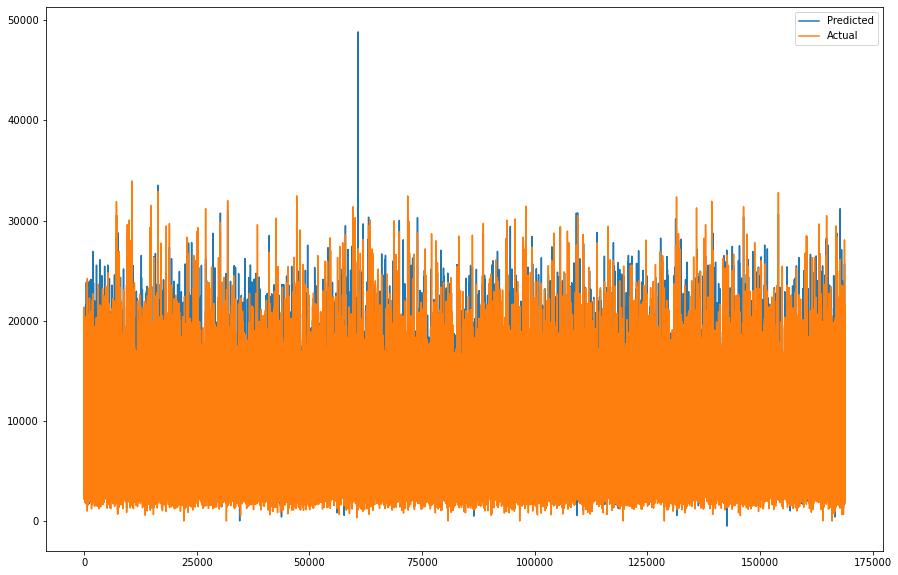

In [92]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

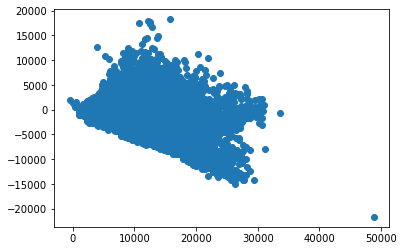

In [93]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))
plt.show()

### RIDGE REGRESSION

In [94]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.01)

In [95]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [98]:
#check the score
ridge.score(X_train, y_train)

0.7620752504291626

In [99]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

##### Checking the Performance on train set

In [100]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2298777.7588471887
RMSE : 1516.1720742868167
MAE : 1047.8075056184714
R2 : 0.7620752504291626
Adjusted R2 : 0.7620555248127258


##### We got r2 score 0.76 which is quite good.

In [101]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

##### Checking the Performance score on test set

In [102]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2270029.7486226712
RMSE : 1506.6617897267693
MAE : 1044.5745764976123
R2 : 0.7618771579403177
Adjusted R2 : 0.7618574159006359


In [103]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

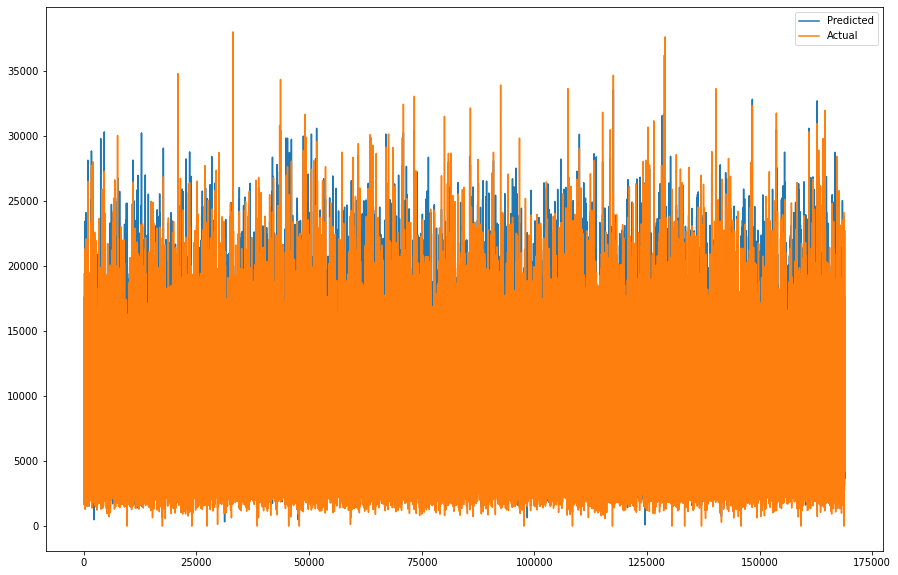

In [98]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

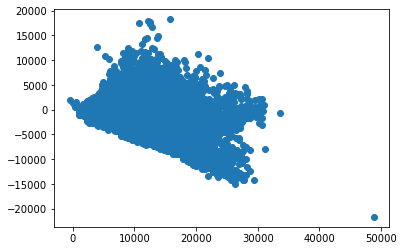

In [104]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))
plt.show()

### RIDGE REGRESSOR WITH CROSS VALIDATION>

In [105]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-10,1e-5,1e-3,1e-1,1,5,10,30,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.1, 1, 5, 10, 30, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [106]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-10}

Using  {'alpha': 1e-10}  the negative mean squared error is:  -2298932.434397206


In [107]:
#get the X_train and X-test value
y_pred_train_ridge=ridge_regressor.predict(X_train)
y_pred_test_ridge=ridge_regressor.predict(X_test)

#Checking the Performance on train set

In [108]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2298777.7588471873
RMSE : 1516.1720742868163
MAE : 1047.8075013344785
R2 : 0.7620752504291628
Adjusted R2 : 0.762055524812726


##### No such changes on R2 Score after applying the Cross Validation.

In [109]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression with cross validation',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

##### Checking the Performance score on test set

In [110]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2270029.749362802
RMSE : 1506.6617899723885
MAE : 1044.5745723182815
R2 : 0.7618771578626791
Adjusted R2 : 0.7618574158229908


In [111]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression with cross validation',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

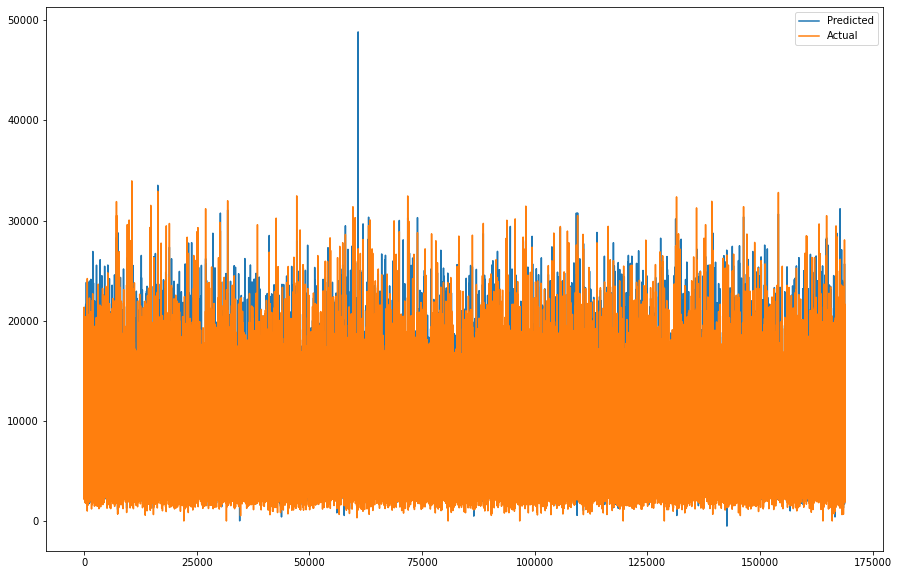

In [112]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

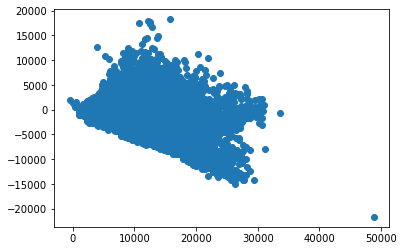

In [113]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))
plt.show()

## DECISION TREE

##### Now we will use Desision tree algorithm.Which doesn't care whether the multicolinearity is high or low. So we gonna use all the feature which we have in our dataset.

In [114]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final_df.columns.drop(['Store','Date','Open','Sales'])

In [115]:
indep_var

Index(['DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday', 'StoreType',
       'Assortment', 'CompetitionDistance', 'Promo2', 'year', 'month', 'date',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [116]:
# Create the data of independent variables
X = final_df[indep_var]

# Create the dependent variable data
y = final_df[dep_var]

In [118]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)
print(X_train.shape)
print(X_test.shape)

(675513, 14)
(168879, 14)


In [119]:
X_train_with_coumns = X_train

In [120]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=10, max_leaf_nodes=100,random_state=1)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=10,
                      max_leaf_nodes=100, random_state=1)

In [123]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

##### Checking the Performance on train set

In [124]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8295890506621079
MSE : 1646473.941481862
RMSE : 1283.1500073965872
MAE : 933.0923720527759
R2 : 0.8295890506621079
Adjusted R2 : 0.8295749224092492


#**Looks like our r2 score value is 0.83 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [125]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

##### Checking the Performance on test set

In [126]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 1639713.2468361307
RMSE : 1280.5128842913416
MAE : 931.1292278652851
R2 : 0.8279964486208016
Adjusted R2 : 0.8279821883301576


In [127]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

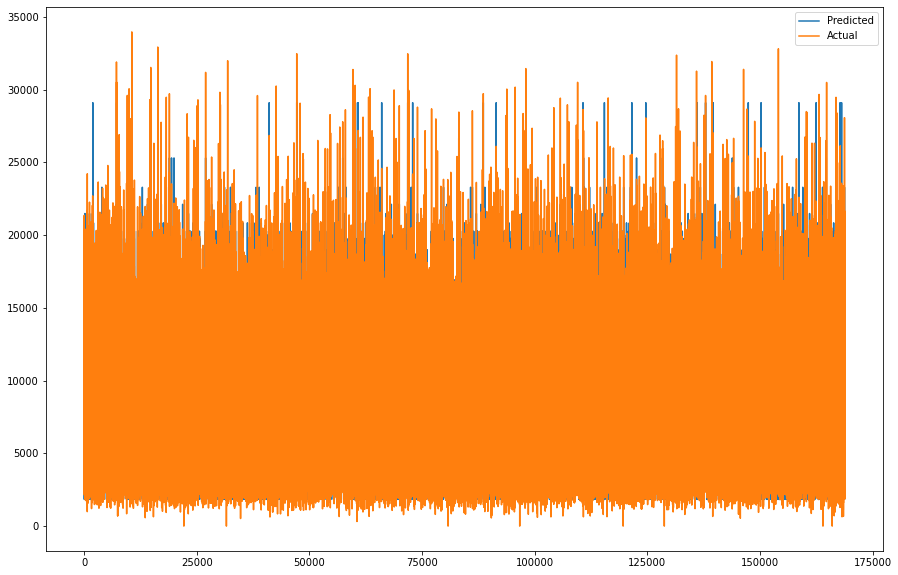

In [128]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

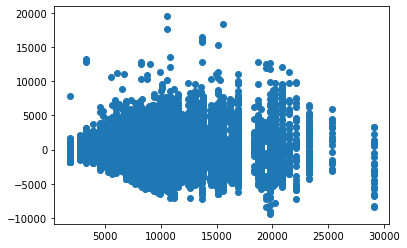

In [129]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))
plt.show()

# **RANDOM FOREST**

In [130]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, criterion='squared_error',random_state=1)

rf_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=1)

In [134]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


##### Checking the Performance on train set

In [133]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9951442749014686
MSE : 46914.97156018549
RMSE : 216.5986416397515
MAE : 140.04712607885378
R2 : 0.9951442749014686
Adjusted R2 : 0.9951438723280878


##### We got 0.99 R2 score on train set which is great but we have check the r2 score on test set to view is there any over fitting. i we get low r2 score on test set so we can say that our model is overfitted.

In [136]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

##### Checking the Performance on test set

In [140]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 316876.4088887565
RMSE : 562.9177638774215
MAE : 369.52164363862664
R2 : 0.9667601223675422
Adjusted R2 : 0.9667573665505127


In [141]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

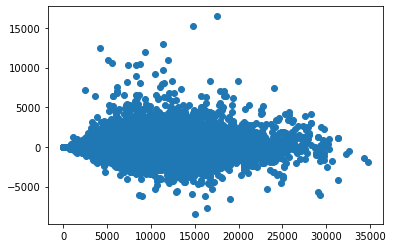

In [142]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.show()

##### Getting the features which are important for our random forest model.

In [143]:
rf_model.feature_importances_

array([1.26047665e-02, 7.40590361e-01, 3.44967177e-02, 1.26003097e-03,
       6.13257005e-02, 1.37218838e-02, 1.04336362e-01, 8.94231833e-03,
       3.89722863e-03, 9.00276196e-03, 9.58166552e-03, 1.57985053e-04,
       5.22523058e-05, 2.99650380e-05])

In [145]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train_with_coumns.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [146]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [147]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Customers,0.74
6,CompetitionDistance,0.10
4,StoreType,0.06
2,Promo,0.03
0,DayOfWeek,0.01
5,Assortment,0.01
7,Promo2,0.01
9,month,0.01
10,date,0.01
3,SchoolHoliday,0.00


In [148]:
features = X_train_with_coumns.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

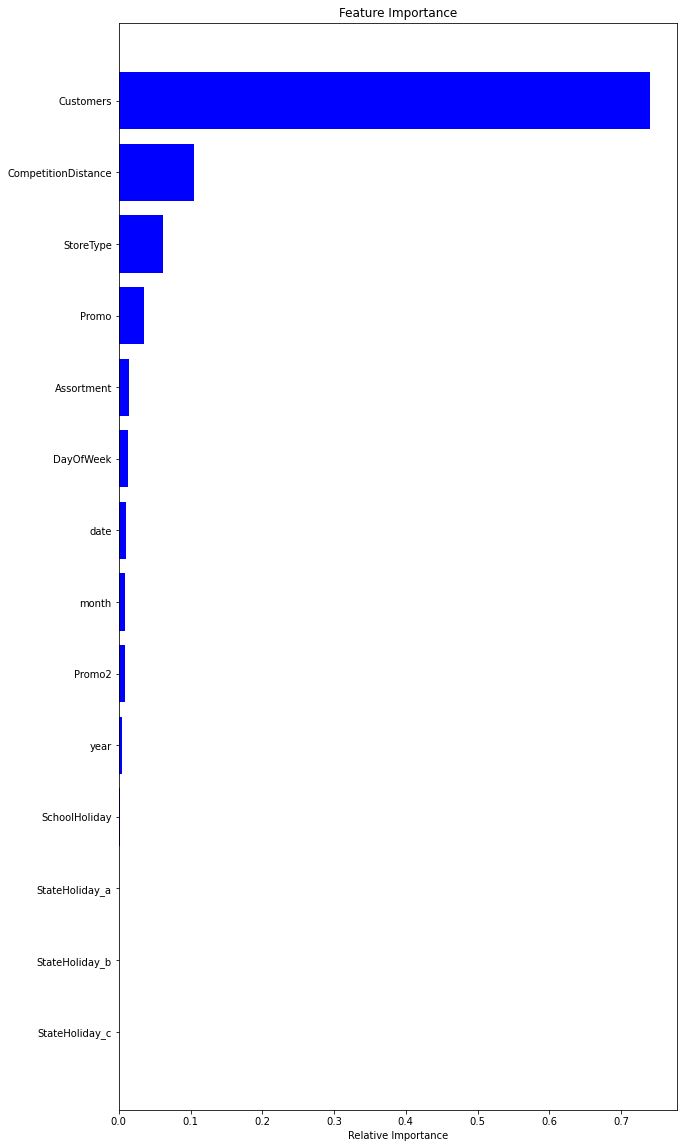

In [149]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##### From the above chart we acn see that Costumers, CompetitionDistance, StoreType and Promo are the main important feature for our algorithm/model.

In [151]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model       MAE  \
Training set 0                       Linear regression   1047.808   
             1                        Lasso regression   1047.808   
             2  Lasso regression with cross validation   1047.808   
             3                        Ridge regression   1047.808   
             4   Ridge regression with cross validation  1047.808   
             5                Decision tree regression    933.092   
             6                Random forest regression    140.047   
             7                Random forest regression    140.047   
Test set     0                       Linear regression   1044.575   
             1                        Lasso regression   1044.575   
             2  Lasso regression with cross validation   1044.575   
             3  Lasso regression with cross validation   1044.575   
             4                        Ridge regression   1044.575   
             5   Ridge regression with cross validation  1044.575   
             6                Decision tree regression    931.129   
             7                Random forest regression    369.522   
             8                Random forest regression    369.522   

                        MSE      RMSE  R2_score  Adjusted R2  
Training set 0  2298777.759  1516.172     0.762         0.76  
             1  2298777.759  1516.172     0.762         0.76  
             2  2298777.759  1516.172     0.762         0.76  
             3  2298777.759  1516.172     0.762         0.76  
             4  2298777.759  1516.172     0.762         0.76  
             5  1646473.941  1283.150     0.830         0.83  
             6    46914.972   216.599     0.995         1.00  
             7    46914.972   216.599     0.995         1.00  
Test set     0  2270029.749  1506.662     0.762         0.76  
             1  2270029.741  1506.662     0.762         0.76  
             2  2270029.666  1506.662     0.762         0.76  
             3  2270029.666  1506.662     0.762         0.76  
             4  2270029.749  1506.662     0.762         0.76  
             5  2270029.749  1506.662     0.762         0.76  
             6  1639713.247  1280.513     0.828         0.83  
             7   316876.409   562.918     0.967         0.97  
             8   316876.409   562.918     0.967         0.97

##### CONCLUSION
During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Sales' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable using corr() Function and for multicollinearity we use VIF Function defined by us. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 5 machine learning algorithms Linear Regression,lasso,ridge,decission tree, Random Forest. We did hyperparameter tuning to improve our model performance.




1.  The sales in the month of December is the highest sales among others. 
2.  The Sales is highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.
3. Those Stores who takes participate in Promotion got their Sales increased.
4.  Type of Store plays an important role in opening pattern of stores. All Type ‘b’ stores never closed except for refurbishment or other reason.
5.    We can observe that most of the stores remain closed during State holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.
6. The R Squared score of all Liner Regression Algorithm with or without Regularization are quit good which is 0.76.
7.  the R Squared score of the Decision Tree Regressor model we got 0.83 on test set which is also good.
8. The Random Forest regressor model perform very well amoung the others.
9. There is no such over fitting seen. 
10.  We can say that random forest regressor model is our optimal model and can be deploy.

